<a href="https://colab.research.google.com/github/YianKim/Complaints-NLP-Visualization-2021/blob/main/4_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D(khaiii).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tqdm import tqdm_notebook #process bar
import string #특수문자를 클리닝에서 제거해주고 싶을 때 사용하려고 특수문자를 불러온다. 
import warnings #warning 제거

from gensim import corpora
from gensim import models
import numpy as np
import re
import gzip
import pickle
import matplotlib.pyplot as  plt
from wordcloud import WordCloud
%matplotlib inline
warnings.filterwarnings("ignore", category=DeprecationWarning) # 경고 알림이 뜨면 모두 무시

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 제목하고 내용이 list로 받아졌을 때, 중복되지 않는 원소만 편입
def merge제목내용(제목, 내용):
  temp = []
  temp += list(내용)
  for i in 제목:
    if i not in 내용:
      temp.append(i)
  return(temp)

merge제목내용(["A","B","DDD"],["A","CD"]) #['A', 'CD', 'B', 'DDD']

['A', 'CD', 'B', 'DDD']

In [ ]:
# 램 한계를 극복하기 위한 글자수 제한
def 글자제한(textvec, LB, UB):
  temp=[]
  for i in textvec:
    if len(i)>LB-1 and len(i)<UB+1:
      temp.append(i)
  return(temp)

글자제한(["A","AA","AAA","AAAA","AAAAA","AAAAAA","AAAAAAA"],3,4)

['AAA', 'AAAA']

In [ ]:
# load and uncompress.
with gzip.open('/content/drive/Shareddrives/2021민원/데이터/clean_data3.pickle', 'rb') as f:
    data = pickle.load(f)

# 그냥 다 합쳐보기
token_list=[]
for i in range(57249):
  print(i)
  token_list.append(merge제목내용(data['제목_nouns'][i], data['질문내용_nouns'][i]))

In [ ]:
# # load and uncompress.
# with gzip.open('/content/drive/Shareddrives/2021민원/데이터/clean_data_khaiii.pickle', 'rb') as f:
#     data = pickle.load(f)
# # 그냥 다 합쳐보기
# temp=[]
# for i in range(57249):
#   print(i)
#   temp.append((글자제한(merge제목내용(data['제목_norm'][i], data['질문내용_norm'][i]),2,10)))
# token_list=temp

In [ ]:
dictionary = corpora.Dictionary(token_list)
# dictionary.token2id

In [ ]:
term_matrix = [dictionary.doc2bow(token) for token in token_list]
# term_matrix

In [ ]:
tfidf = models.TfidfModel(term_matrix)

# for doc in tfidf[term_matrix]:
#     print("doc:")
#     for k, v in doc:
#         print(k, v)

In [ ]:
allword=[]
for i in range(len(dictionary.token2id)):
  allword.append((i,1))

In [ ]:
weight = { name:value for name, value in zip(list(dictionary.token2id.keys()), [x[1] for x in tfidf[allword]]) }

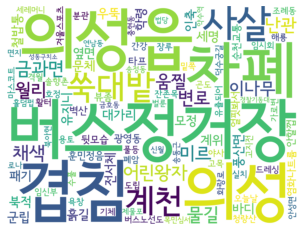

In [ ]:
fp='/content/drive/MyDrive/서울남산체/08SeoulNamsanB_0.ttf'
wordcloud = WordCloud(background_color="white", max_words=100, width=4000, height=3000, font_path=fp).generate_from_frequencies(weight)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# 토픽모델링

model = models.LdaModel(corpus=term_matrix, id2word=dictionary, num_topics=15)
model.print_topics()

[(0,
  '0.034*"시험" + 0.021*"가능" + 0.019*"자격" + 0.018*"신청" + 0.016*"검사" + 0.016*"경우" + 0.014*"요건" + 0.013*"문의" + 0.013*"법상" + 0.012*"병역"'),
 (1,
  '0.038*"경우" + 0.038*"제조" + 0.031*"사용" + 0.025*"허가" + 0.017*"규정" + 0.017*"시설" + 0.015*"환경" + 0.014*"가능" + 0.014*"해당" + 0.013*"여부"'),
 (2,
  '0.049*"시설" + 0.031*"관리" + 0.028*"대행" + 0.024*"설치" + 0.017*"지역" + 0.016*"계획" + 0.015*"실시" + 0.013*"사용" + 0.012*"관련" + 0.011*"현황"'),
 (3,
  '0.047*"계약" + 0.029*"공사" + 0.023*"업체" + 0.019*"건설" + 0.018*"발생" + 0.015*"생산" + 0.015*"제품" + 0.014*"도로" + 0.012*"경우" + 0.011*"인정"'),
 (4,
  '0.069*"정보" + 0.022*"요금" + 0.015*"확인" + 0.014*"경우" + 0.013*"카드" + 0.012*"가능" + 0.012*"국가" + 0.010*"유통" + 0.010*"수산물" + 0.010*"인증"'),
 (5,
  '0.042*"광고" + 0.040*"처리" + 0.037*"폐수" + 0.028*"어업" + 0.024*"민원" + 0.020*"서비스" + 0.017*"측정" + 0.017*"제공" + 0.015*"위치" + 0.015*"설치"'),
 (6,
  '0.042*"지원" + 0.032*"사업" + 0.026*"대상" + 0.023*"교육" + 0.023*"의료" + 0.022*"내용" + 0.017*"기관" + 0.013*"성과" + 0.013*"신청" + 0.013*"지급"'),
 (7,
  '0.036*"갱신" + 0.03